# ค้นหาหุ้นนำตลาดด้วย MACD
- ใช้กลยุทธ์ MACD ในการหาหุ้นนำตลาดในกลุ่มหุ้นที่คุณสนใจ

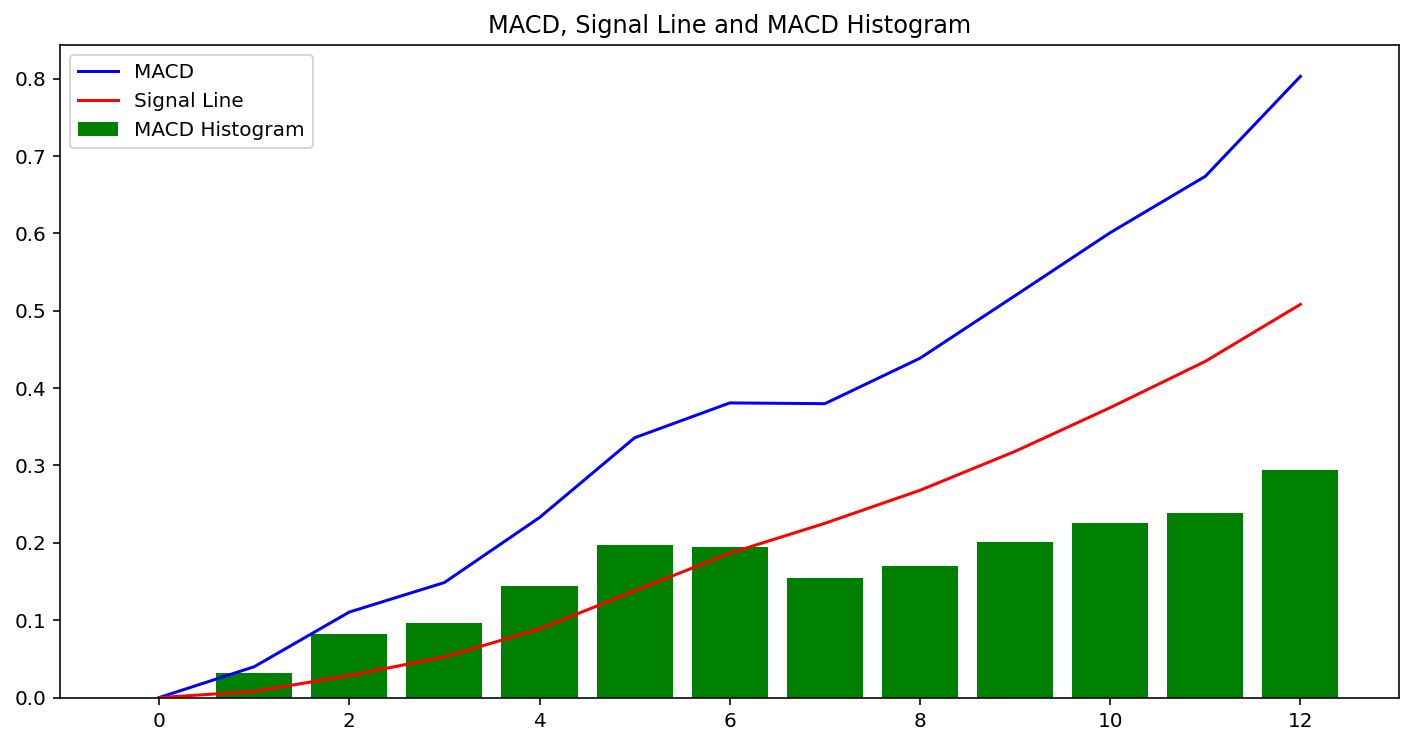

0.8029866689908545 0.29471491732812194


In [277]:
import pandas as pd
import matplotlib.pyplot as plt

# สมมติว่าคุณมี DataFrame ที่มีคอลัมน์ 'Close' ซึ่งมีข้อมูลราคาปิดหุ้น
data = {
    'Close': [22, 22.5, 23, 22.8, 23.5, 24, 23.6, 23.2, 24, 24.5, 24.8, 25, 26]
}
df = pd.DataFrame(data)

def macd(data,plot=False):
    # คำนวณ Exponential Moving Averages (EMA) สำหรับระยะสั้นและระยะยาว
    short_ema = data.ewm(span=12, adjust=False).mean()  # EMA 12 วัน
    long_ema = data.ewm(span=26, adjust=False).mean()   # EMA 26 วัน

    # คำนวณ MACD และ Signal line
    data['MACD'] = short_ema - long_ema
    data['Signal_line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # คำนวณ MACD Histogram
    data['MACD_Histogram'] = data['MACD'] - data['Signal_line']

    # พล็อตกราฟ
    if(plot):
        plt.figure(figsize=(12, 6))
        plt.plot(data['MACD'], label='MACD', color='blue')
        plt.plot(data['Signal_line'], label='Signal Line', color='red')
        plt.bar(data.index, data['MACD_Histogram'], label='MACD Histogram', color='green')
        plt.legend(loc='upper left')
        plt.title('MACD, Signal Line and MACD Histogram')
        plt.show()
    return data['MACD'].iloc[-1],data['MACD_Histogram'].iloc[-1]
    
MACD,MACD_Histogram = macd(df,True)
print(MACD,MACD_Histogram)

In [7]:
import sys
import os

# กำหนด path ไปยังโฟลเดอร์ 'libs' ที่อยู่ข้างนอกของ 'subfolder'
# ใช้ os.path.abspath สำหรับการรับ absolute path
libs_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))

# ใส่ path นี้ไปที่ตำแหน่งแรกใน sys.path เพื่อให้ Python ค้นหาที่นี่ก่อน
if libs_path not in sys.path:
    sys.path.insert(0, libs_path)

import starfishXapi as sx
sx.enable_autoreload()
print(sx.__version__)

Autoreload enabled.
0.00101


In [9]:
dataReader = sx.HistStockPrice()

*you are using nologin method, data you access may be limited


In [62]:
# get Historical Data 

SYMBOL,MACD,MACD_Histogram = [],[],[]
basket = ['DUSIT','RBF','KCE','ILM','TIDLOR','HL','SYMC','NEO','M','HMPRO','TRUE']#,'DELTA','ADVANC','PTTEP','EGCO']
for i in basket:
   print(i,end=',')
   df = dataReader.getPrice(symbol=i,start='2020-01-01',stop='2024-09-10') 
   _a,_b = macd(df['close'])
   SYMBOL.append(i)
   MACD.append(_a) 
   MACD_Histogram.append(_b)
    
df = pd.DataFrame({'MACD':MACD,'MACD_Histogram':MACD_Histogram},index=SYMBOL)
df

DUSIT,RBF,KCE,ILM,TIDLOR,HL,SYMC,NEO,M,HMPRO,TRUE,

MACD  MACD_Histogram
DUSIT   0.321621        0.088812
RBF    -0.188539        0.180374
KCE    -0.913467        0.176812
ILM     0.082463        0.154251
TIDLOR  0.571415        0.368718
HL     -0.111831        0.139330
SYMC    0.034981        0.059453
NEO    -1.158240        0.055653
M       0.273853        0.327872
HMPRO   0.464996        0.215991
TRUE    0.230485       -0.032270

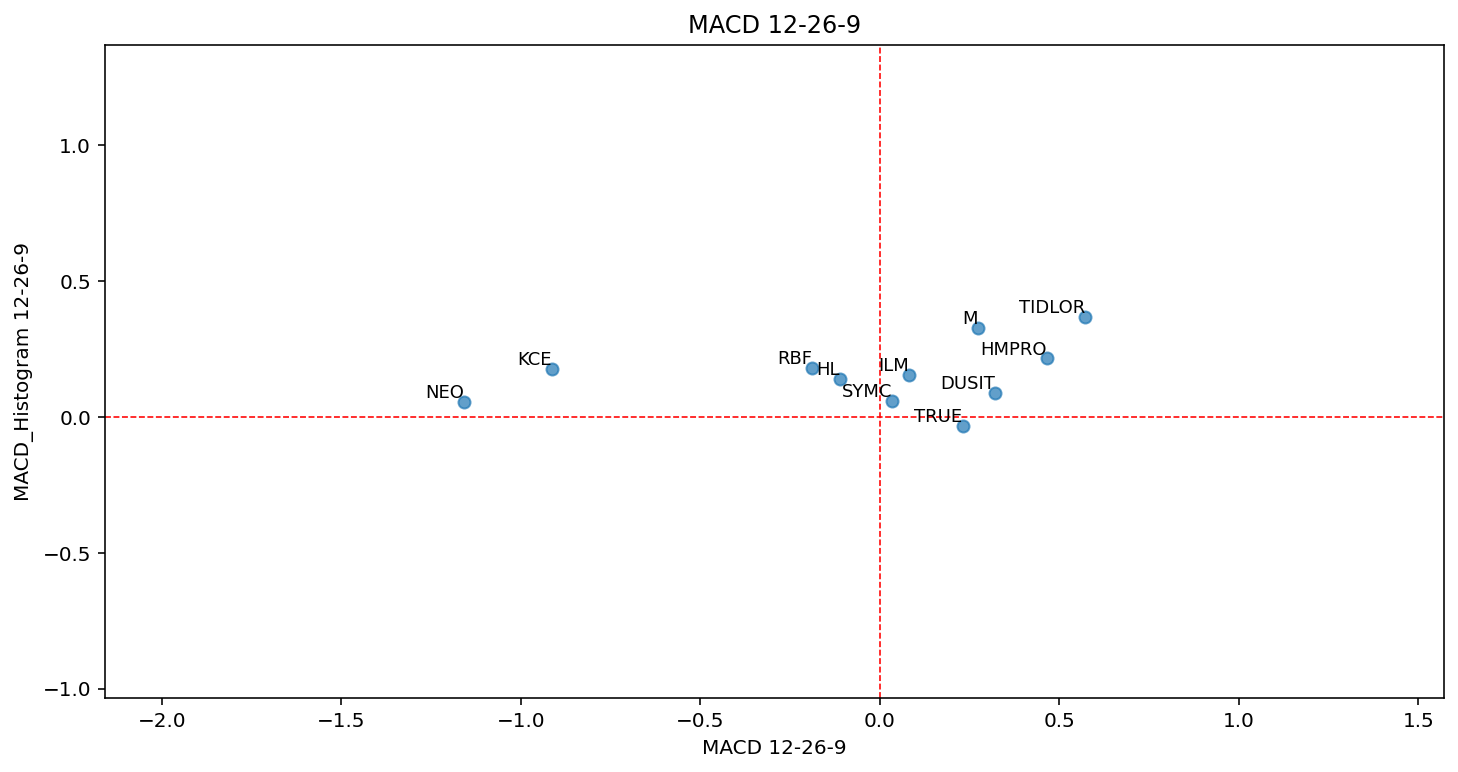

In [65]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,6))

labels = list(df.index)
x = list(df['MACD'])
y = list(df['MACD_Histogram'])
plt.scatter(x,y,alpha=0.7)
plt.title('MACD 12-26-9')
plt.xlabel('MACD 12-26-9')
plt.ylabel('MACD_Histogram 12-26-9')

# เพิ่มเส้นแกน X และ Y
plt.axhline(0, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน Y ผ่านจุด 0
plt.axvline(0, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน X ผ่านจุด 0

# ตั้งค่าการแสดงผลแกน X และ Y ให้มีช่วงที่เหมาะสม
plt.xlim(min(x)-1, max(x)+1)  # ขยายขอบเขตของแกน X
plt.ylim(min(y)-1, max(y)+1)  # ขยายขอบเขตของแกน Y

# เพิ่ม label บนแต่ละจุด
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=9, ha='right', va='bottom')
plt.show()

In [66]:
df

MACD  MACD_Histogram
DUSIT   0.321621        0.088812
RBF    -0.188539        0.180374
KCE    -0.913467        0.176812
ILM     0.082463        0.154251
TIDLOR  0.571415        0.368718
HL     -0.111831        0.139330
SYMC    0.034981        0.059453
NEO    -1.158240        0.055653
M       0.273853        0.327872
HMPRO   0.464996        0.215991
TRUE    0.230485       -0.032270

## หาหุ้นนำตลาดในกลุ่มอุตสาหกรรม

In [72]:
# สร้างตะกร้าในกลุ่มอุตสาหกรรม
basket = sx.get_friend_in_sector('erw')
for i in basket:
  print(i,end=',')  

ERW,CSR,BEYOND,CENTEL,ROH,MINT,VRANDA,SHR,LRH,DUSIT,ASIA,GRAND,MANRIN,OHTL,SHANG,

In [76]:
# get Historical Data 
SYMBOL,MACD,MACD_Histogram = [],[],[]
for i in basket:
   print(i,end=',')
   df = dataReader.getPrice(symbol=i,start='2020-01-01',stop='2024-09-11') 
   _a,_b = macd(df['close'])
   SYMBOL.append(i)
   MACD.append(_a) 
   MACD_Histogram.append(_b)

ERW,CSR,BEYOND,CENTEL,ROH,MINT,VRANDA,SHR,LRH,DUSIT,ASIA,GRAND,MANRIN,OHTL,SHANG,

MACD  MACD_Histogram
ERW     0.022908        0.040507
CSR     0.016951       -0.133545
BEYOND -0.044504        0.038058
CENTEL  0.082707        0.577770
ROH    -0.037875       -0.009728
MINT    0.171552        0.319135
VRANDA  0.037351        0.019644
SHR     0.052968        0.017089
LRH    -0.575087       -0.101231
DUSIT   0.302245        0.055549
ASIA    0.080654        0.023215
GRAND   0.000670        0.001399
MANRIN -0.309859       -0.184805
OHTL    3.872469        2.801828
SHANG   0.703607        0.401009

In [84]:
df = pd.DataFrame({'MACD':MACD,'MACD_Histogram':MACD_Histogram},index=SYMBOL)

In [96]:
import plotly.graph_objects as go

labels = list(df.index)
x = list(df['MACD'])
y = list(df['MACD_Histogram'])

# สร้าง trace สำหรับ scatter plot
trace = go.Scatter(
    x=x,
    y=y,
    mode='markers+text',  # กำหนดให้แสดงทั้งจุดและข้อความ
    marker=dict(size=8, color='blue'),  # กำหนดสีและขนาดของจุด
    text=labels,  # ข้อความที่จะแสดงบนแต่ละจุด
    textposition='top center'  # ตำแหน่งของข้อความ
)

# สร้าง layout
layout = go.Layout(
    title='หุ้นในกลุ่มอุตสาหกรรมท่องเที่ยวและโรงแรม',
    xaxis=dict(title='MACD'),
    yaxis=dict(title='MACD_Histogram'),
    hovermode='closest'  # กำหนดโหมดการแสดงข้อมูลเมื่อเลื่อนเมาส์ไปยังจุด
)

# สร้าง figure และเพิ่ม trace
fig = go.Figure(data=[trace], layout=layout)

# แสดงผลกราฟ
#fig.show()
#%config InlineBackend.figure_format='retina'

ตัวอย่างผลลัพธ์
![image](macd_plot.png)

## MACD ตีความ

In [281]:
import random
d1 = [10]
for i in range(1,30):
  if(i<20):
    d1.append(d1[i-1]+random.randint(-3,10)/10)
  else:
    d1.append(d1[i-1]+random.randint(1,3)/10)

In [202]:
d2 = [10]
for i in range(1,30):
  if(i<20):
    d2.append(d2[i-1]+random.randint(-3,10)/10)
  else:
    d2.append(d2[i-1]+random.randint(-4,1)/10)

In [203]:
d3 = [10]
for i in range(1,30):
  if(i<20):
    d3.append(d3[i-1]+random.randint(-6,2)/10)
  else:
    d3.append(d3[i-1]+random.randint(-2,5)/10)

In [285]:
d4 = [10]
for i in range(1,30):
  if(i<20):
    d4.append(d4[i-1]+random.randint(-6,2)/10)
  else:
    d4.append(d4[i-1]+random.randint(-4,1)/10)

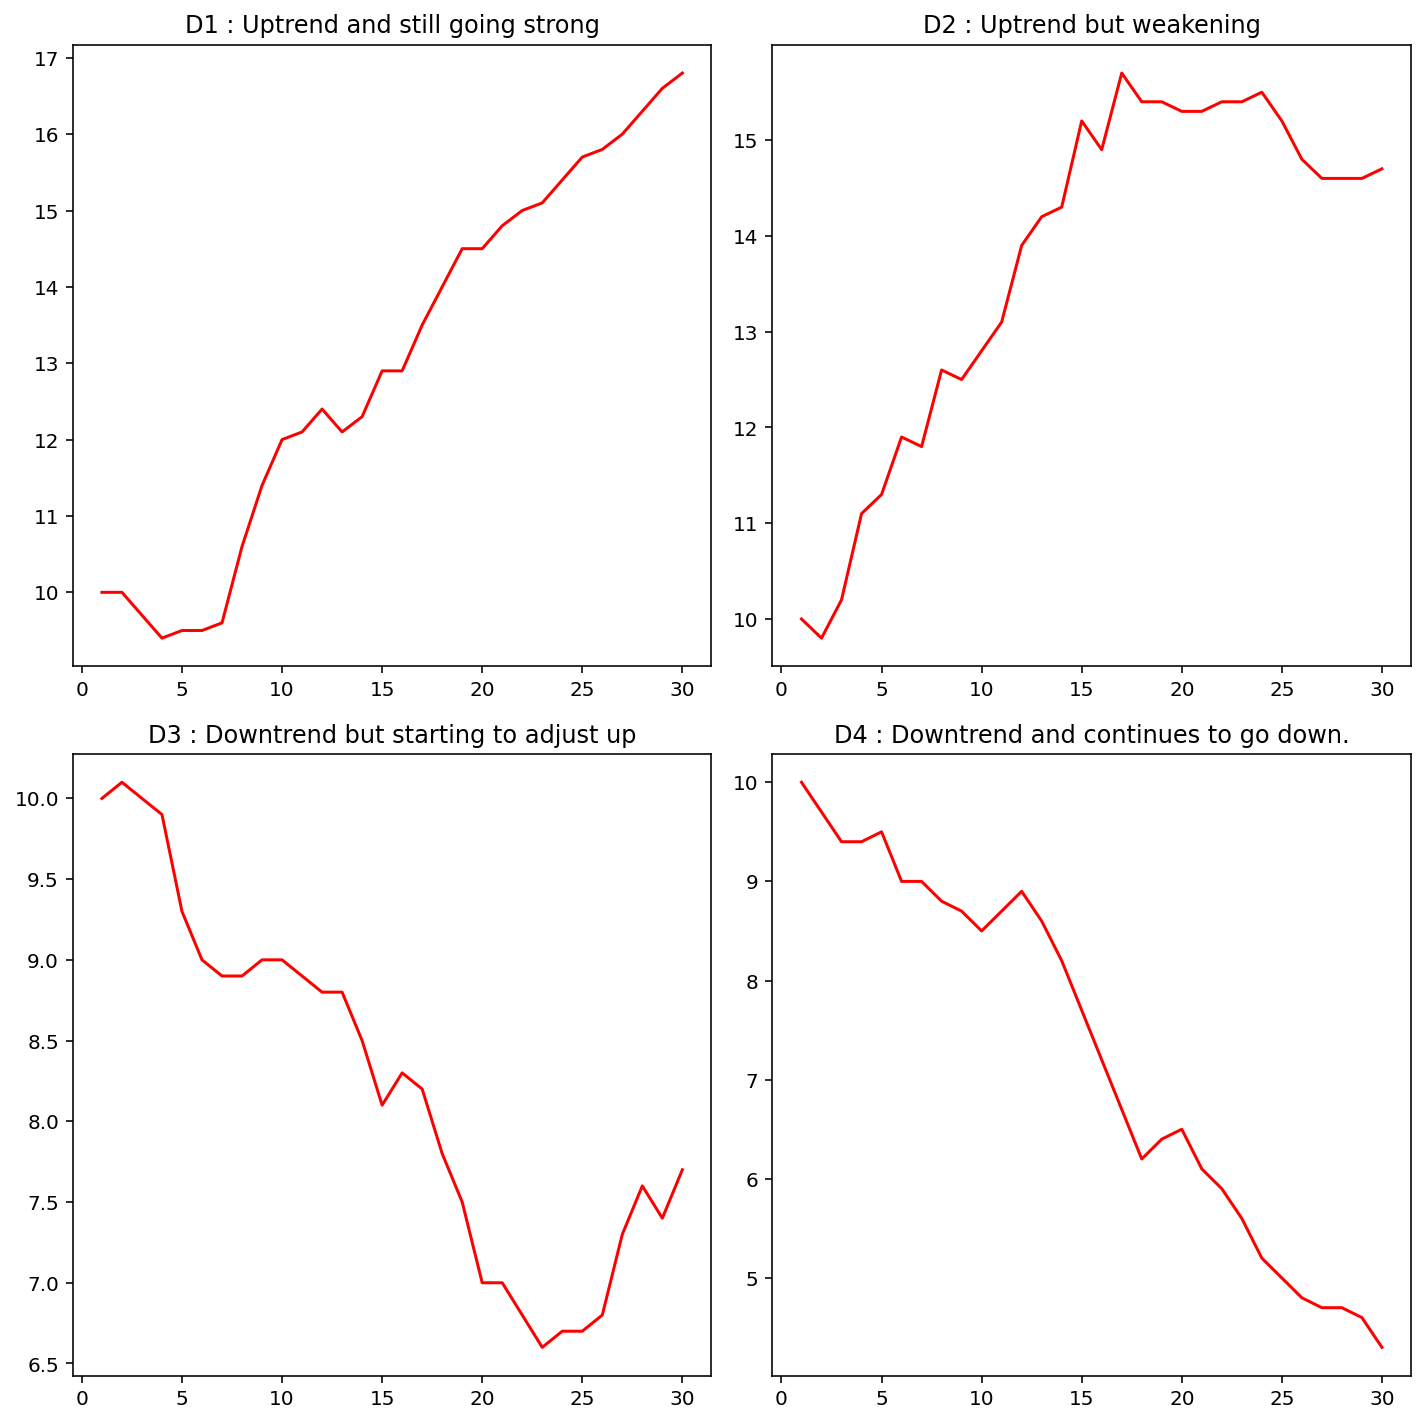

In [293]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# สร้างกราฟในแต่ละ axes
axs[0, 0].plot(range(1,len(d1)+1),d1, 'r')  # แถวที่ 1, หลักที่ 1
axs[0, 0].set_title('D1 : Uptrend and still going strong')

axs[0, 1].plot(range(1,len(d2)+1),d2, 'r')  # แถวที่ 1, หลักที่ 2
axs[0, 1].set_title('D2 : Uptrend but weakening')

axs[1, 0].plot(range(1,len(d3)+1), d3, 'r')  # แถวที่ 2, หลักที่ 1
axs[1, 0].set_title('D3 : Downtrend but starting to adjust up')

axs[1, 1].plot(range(1,len(d4)+1), d4, 'r')  # แถวที่ 2, หลักที่ 2
axs[1, 1].set_title('D4 : Downtrend and continues to go down.')
# ปรับระยะห่างระหว่าง subplots เพื่อหลีกเลี่ยงการทับกันของ labels และ titles
fig.tight_layout()

# แสดงผลกราฟ
plt.show()

In [294]:
# get Historical Data 
basket = [d1,d2,d3,d4]
s = ['D1','D2','D3','D4']
SYMBOL,MACD,MACD_Histogram = [],[],[]
for i in range(len(basket)):
   _a,_b = macd(pd.DataFrame({'Close':basket[i] }))
   print(_a,_b)
   SYMBOL.append(s[i])
   MACD.append(_a) 
   MACD_Histogram.append(_b)

df = pd.DataFrame({'MACD':MACD,'MACD_Histogram':MACD_Histogram},index=SYMBOL)
df

1.4426709665388255 0.1364129939470451
0.7188280704526928 -0.2398522622744409
-0.5009043699107005 0.1130318532980571
-1.1834463135734152 -0.10865719952096109


MACD  MACD_Histogram
D1  1.442671        0.136413
D2  0.718828       -0.239852
D3 -0.500904        0.113032
D4 -1.183446       -0.108657

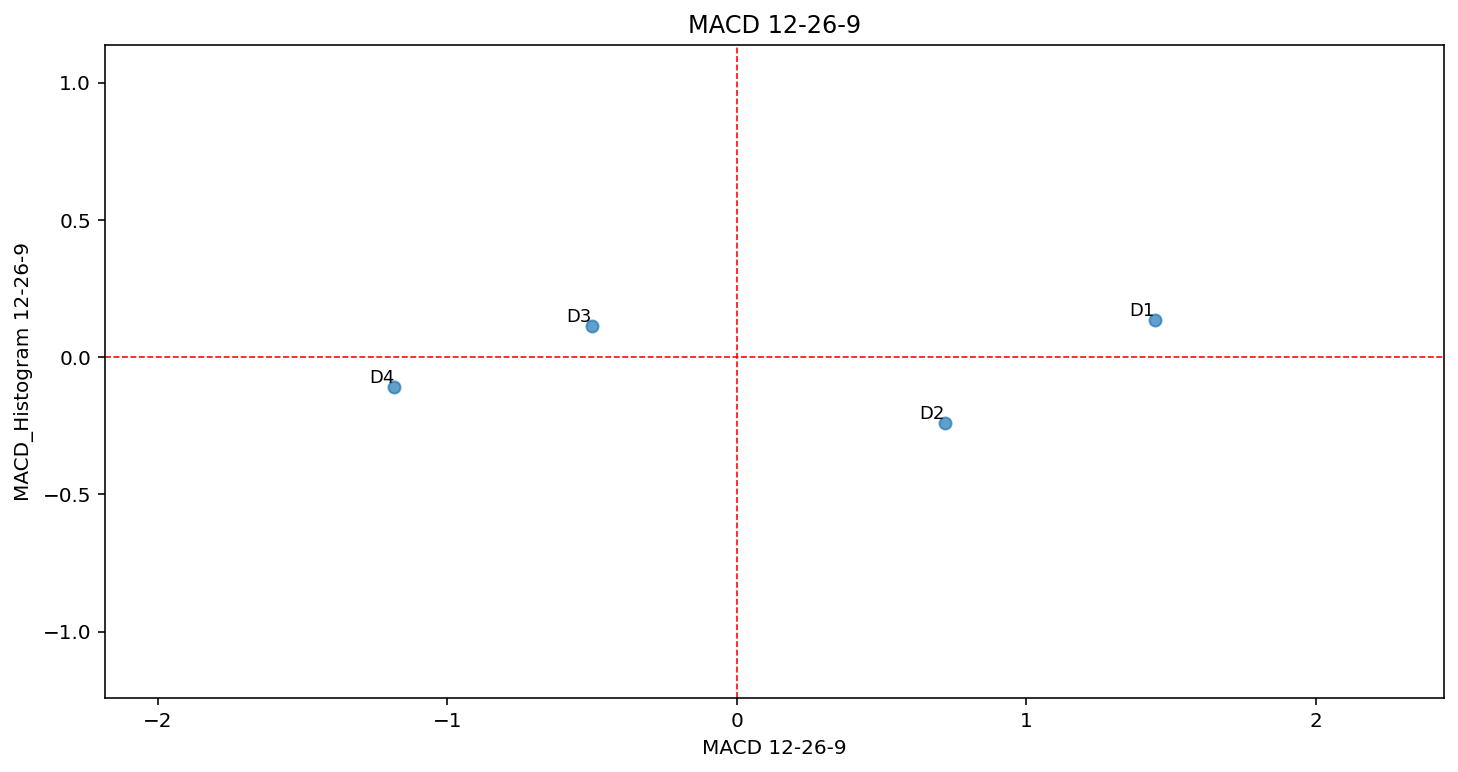

In [295]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,6))

labels = list(df.index)
x = list(df['MACD'])
y = list(df['MACD_Histogram'])
plt.scatter(x,y,alpha=0.7)
plt.title('MACD 12-26-9')
plt.xlabel('MACD 12-26-9')
plt.ylabel('MACD_Histogram 12-26-9')

# เพิ่มเส้นแกน X และ Y
plt.axhline(0, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน Y ผ่านจุด 0
plt.axvline(0, color='red',linewidth=0.8,linestyle='--')  # เส้นแกน X ผ่านจุด 0

# ตั้งค่าการแสดงผลแกน X และ Y ให้มีช่วงที่เหมาะสม
plt.xlim(min(x)-1, max(x)+1)  # ขยายขอบเขตของแกน X
plt.ylim(min(y)-1, max(y)+1)  # ขยายขอบเขตของแกน Y

# เพิ่ม label บนแต่ละจุด
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=9, ha='right', va='bottom')
plt.show()